# 1) How many samples and features does each file have?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
lis = pd.read_csv('listings.csv')
print(f'listings.csv: \t\t rows {lis.shape[0]} \t features: {lis.shape[1]}')
print('-'*64)

ds1 = pd.read_csv('reviews1.csv')
print(f'reviews1.csv: \t\t rows {ds1.shape[0]} \t features: {ds1.shape[1]}')
ds2 = pd.read_csv('reviews2.csv')
print(f'reviews2.csv: \t\t rows {ds2.shape[0]} \t features: {ds2.shape[1]}')
ds3 = pd.read_csv('reviews3.csv')
print(f'reviews3.csv: \t\t rows {ds3.shape[0]} \t features: {ds3.shape[1]}')
ds4 = pd.read_csv('reviews4.csv')
print(f'reviews4.csv: \t\t rows {ds4.shape[0]} \t features: {ds4.shape[1]}')
print('-'*64)

rate = pd.concat([ds1, ds2, ds3, ds4])
print(f'concatenated reviews: \t rows {rate.shape[0]} \t features: {rate.shape[1]}')


listings.csv: 		 rows 9582 	 features: 67
----------------------------------------------------------------
reviews1.csv: 		 rows 100000 	 features: 6
reviews2.csv: 		 rows 100000 	 features: 6
reviews3.csv: 		 rows 100000 	 features: 6
reviews4.csv: 		 rows 106607 	 features: 6
----------------------------------------------------------------
concatenated reviews: 	 rows 406607 	 features: 6


# 2) What are the types of your features?

 We can answer this question by creating directories that map the name of each column to the data type of that column for the listings and the rarings, respectively. This allows for convienient checks for the type of any column which might be useful later on.

Beginning with the <b>listings<b>:

In [4]:
lis_types = {y:type(x) for x,y in zip(lis.iloc[0,:], lis.columns)}
lis_types

{'id': numpy.int64,
 'listing_url': str,
 'scrape_id': numpy.int64,
 'last_scraped': str,
 'name': str,
 'description': str,
 'neighborhood_overview': str,
 'picture_url': str,
 'host_id': numpy.int64,
 'host_url': str,
 'host_name': str,
 'host_since': str,
 'host_location': str,
 'host_about': str,
 'host_response_time': float,
 'host_response_rate': float,
 'host_acceptance_rate': float,
 'host_is_superhost': str,
 'host_thumbnail_url': str,
 'host_picture_url': str,
 'host_neighbourhood': str,
 'host_listings_count': numpy.float64,
 'host_total_listings_count': numpy.float64,
 'host_verifications': str,
 'host_has_profile_pic': str,
 'host_identity_verified': str,
 'neighbourhood': str,
 'neighbourhood_cleansed': str,
 'neighbourhood_group_cleansed': numpy.float64,
 'latitude': numpy.float64,
 'longitude': numpy.float64,
 'property_type': str,
 'room_type': str,
 'accommodates': numpy.int64,
 'bathrooms': numpy.float64,
 'bathrooms_text': str,
 'bedrooms': numpy.float64,
 'beds': n

This way we're creating a dictionary for the <b>ratings<b> in a similar manner:

In [6]:
rate_types = {y:type(x) for x,y in zip(rate.iloc[0,:], rate.columns)}
rate_types

{'listing_id': numpy.int64,
 'id': numpy.int64,
 'date': str,
 'reviewer_id': numpy.int64,
 'reviewer_name': str,
 'comments': str}

# 3) Are there any missing values? If yes, how many columns and how many rows are affected?

Considering that a row or a column is affected by missing values whenever a NaN value is present in it, we can begin by looking for rows that have at least one NaN value in them for the listing and the ratings.

In [7]:
print(f'listings.csv affected rows: {(lis.isna().sum(axis=1) > 0).sum()}')

listings.csv affected rows: 9582


In [8]:
print(f'Ratings affected rows: {(rate.isna().sum(axis=1) > 0).sum()}')

Ratings affected rows: 407


Similarly, we can apply the same logic for the columns of each file:

In [9]:
print(f'listings.csv affected columns: {(lis.isna().sum(axis=0) > 0).sum()}')

listings.csv affected columns: 29


In [10]:
print(f'listings.csv affected columns:{(rate.isna().sum(axis=0) > 0).sum()}')

listings.csv affected columns:1


We can also check for invalid rows, i.e. rows with all features missing:

In [11]:
print(f'listing.csv rows with all features missing: {(lis.isna().sum(axis=1) == lis.shape[1]).sum()}')

listing.csv rows with all features missing: 0


In [12]:
print(f'ratings rows with all features missing: {(rate.isna().sum(axis=1) == rate.shape[1]).sum()}')

ratings rows with all features missing: 0


When it comes to the columns of each dataframe it might be proven useful to check for the number of nan values as we can obtain a clear picture of how much each column is affected by missing values.

Beginning with the <b>listings<b>:

In [13]:
print('-'*11 + 'listings.csv column nan values' + '-'*11)
pd.set_option('display.max_rows', lis.shape[0])
lis.isna().sum(axis=0)

-----------listings.csv column nan values-----------


id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               3
description                                       96
neighborhood_overview                           2960
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          3
host_since                                         3
host_location                                     18
host_about                                      4116
host_response_time                              2244
host_response_rate                              2244
host_acceptance_rate                            2304
host_is_superhost                                  3
host_thumbnail_url                            

As can be seen from the output above, there are three features of the listings that are void of any information (neighbourhood_group_cleansed, bathrooms and calendar_updated), therefore can be discarded from the dataframe.

Also for the <b>ratings</b> we have:

In [14]:
print('--Ratings column nan values--')
pd.set_option('display.max_rows', rate.shape[0])
rate.isna().sum(axis=0)

--Ratings column nan values--


listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         407
dtype: int64

# 4) How many listings per neighbourhood are there?

Although there is a feature named **neighbourhood** in the dataframe for the listings, it often contains duplicate values which are slightly variated in spelling, for example *'Athens,Attica,Greece'* and *'Athens, Αττική, Greece'* .

Another feature which can be used in this case is neighbourhood_cleansed, which contains much more concise information about the neighbourhood of each listing.

In [15]:
lis['neighbourhood_cleansed'].value_counts()

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1866
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  841
ΝΕΟΣ ΚΟΣΜΟΣ                          713
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             699
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     599
ΠΑΓΚΡΑΤΙ                             383
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      381
ΚΟΛΩΝΑΚΙ                             330
ΑΜΠΕΛΟΚΗΠΟΙ                          329
ΑΚΡΟΠΟΛΗ                             319
ΘΗΣΕΙΟ                               294
ΚΕΡΑΜΕΙΚΟΣ                           244
ΣΤΑΔΙΟ                               223
ΠΕΤΡΑΛΩΝΑ                            214
ΚΥΨΕΛΗ                               201
ΙΛΙΣΙΑ                               172
ΓΟΥΔΙ                                162
ΖΑΠΠΕΙΟ                              141
ΛΥΚΑΒΗΤΤΟΣ                           117
ΠΑΤΗΣΙΑ                              117
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     116
ΝΙΡΒΑΝΑ                              105
ΓΚΥΖΗ                                 88
ΚΟΛΩΝΟΣ                               82
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ 

# 5) How many listings per room type are there?

In [16]:
lis_room_type = lis.room_type.value_counts()

In [17]:
type(lis_room_type)
print(lis_room_type)

Entire home/apt    8463
Private room        891
Hotel room          138
Shared room          90
Name: room_type, dtype: int64


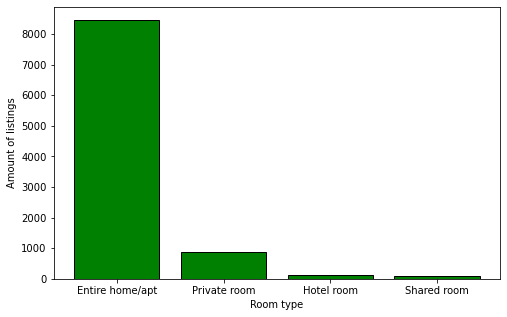

In [18]:
plt.figure(figsize=(8,5))
plt.bar(lis_room_type.index, lis_room_type.values, edgecolor = "black", color = "green")
plt.xlabel("Room type")
plt.ylabel("Amount of listings")
plt.show()

# 6) How many listings per room number are there?

In [19]:
lis_bedrooms = lis.bedrooms.value_counts()

In [20]:
print(lis_bedrooms)

1.0     5483
2.0     2579
3.0      507
4.0      132
5.0       29
6.0       28
10.0       5
7.0        4
9.0        1
12.0       1
Name: bedrooms, dtype: int64


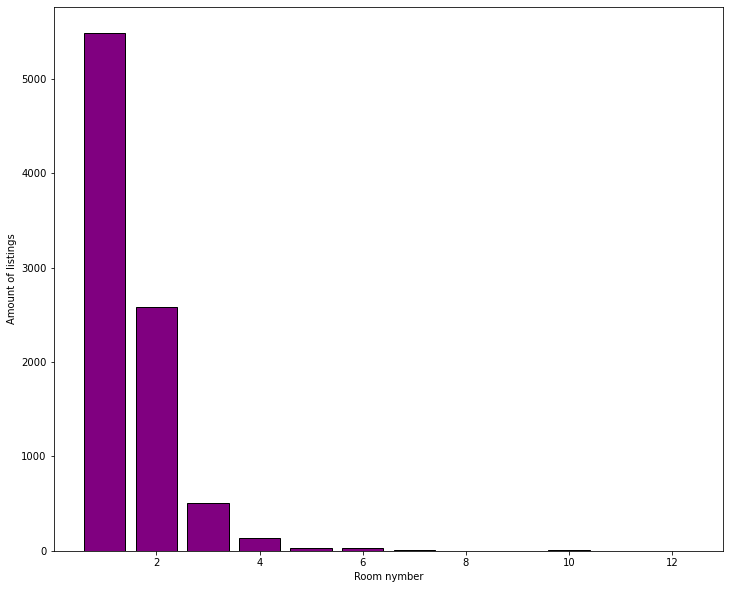

In [21]:
plt.figure(figsize= (12,10))
plt.bar(lis_bedrooms.index, lis_bedrooms.values, edgecolor = "black", color = "purple")
plt.xlabel("Room nymber")
plt.ylabel("Amount of listings")
plt.show()

# 7) What is the distribution of listings per host? What are the most listings that a single host has?

In [22]:
pd.set_option('display.max_rows', 10)
lis.host_id.value_counts()

29927830     156
1621474       75
20104194      74
112527018     65
748818        62
            ... 
520237         1
199958575      1
243652656      1
62296113       1
158042111      1
Name: host_id, Length: 4800, dtype: int64

In [23]:
lis.host_id.value_counts().max()

156

# 8) When was the first host registered?

In [24]:
host_since = lis.copy()
host_since.dropna(subset=["host_since"], axis = 0, inplace = True)
first_registration_date = host_since["host_since"].min()

In [25]:
print("The first host has been registered since {}" .format(first_registration_date))

The first host has been registered since 2009-09-08


# 9) What year had the most hosts registered?

We are going to get all the **years** that can be found in the dataset and then store the number of **hosts per year**.

In [26]:
years = []
for i in range (len(host_since)):
    year = str(host_since["host_since"].iloc[i])[:4]
    if not year in years:
        years.append(year)

In [27]:
hosts = []
for year in years:
    count = 0
    for i in range(len(host_since)):
        if str(host_since["host_since"].iloc[i])[:4] == year:
            count += 1
    hosts.append(count)

In [28]:
print("{} hosts have been registered since {}." .format(hosts[np.argmax(hosts)], years[np.argmax(hosts)]))

1713 hosts have been registered since 2018.


We are now going to sort the **years**:

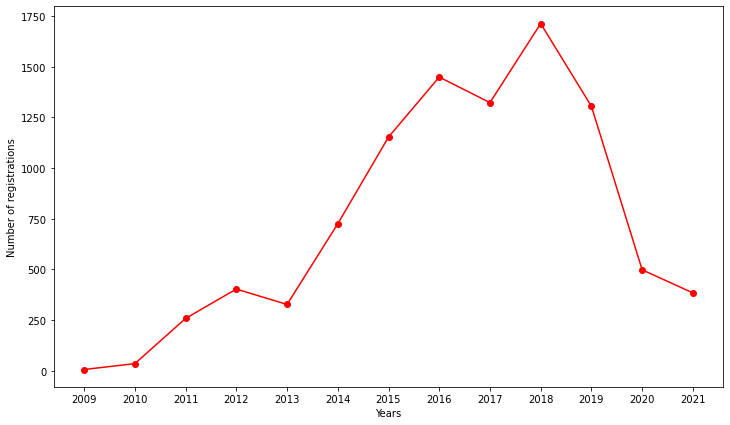

In [29]:
i = 0
while i <= len(years)-2:
    minimum = i
    j = i+1
    while j <= len(years)-1:
        if years[j] <= years[minimum]:
            minimum = j
        j += 1
    years[i], years[minimum] = years[minimum], years[i]
    hosts[i], hosts[minimum] = hosts[minimum], hosts[i]
    i += 1


plt.figure(figsize=(12, 7))
plt.plot(years, hosts, marker="o", color="red")
plt.xlabel("Years")
plt.ylabel("Number of registrations")
plt.show()

# 10) How many identified hosts are there? What is their percentage over all hosts?

In [30]:
num_of_verified_hosts = lis.host_identity_verified.value_counts()['t']
num_of_verified_hosts

6928

In [31]:
num_of_unverified_hosts = lis.host_identity_verified.value_counts()['f']
percentage_of_verified = (num_of_verified_hosts*100) / (num_of_verified_hosts + num_of_unverified_hosts)
print(f'{percentage_of_verified:.2f}' + '%')

72.32%


# 11) What are the top-20 most common amenities provided by the hosts?

We are going to store the **amenities** into a list (duplicates might exist) :

In [34]:
all_amenities = []
for idx in range(len(lis["amenities"])):
    for amenity in lis["amenities"][idx].split(", "):
        if "[" in amenity:
            amenity = amenity[1:]
        if "]" in amenity:
            amenity = amenity [:-2]
        amenity = amenity[1:-1]
        all_amenities.append(amenity)

Next, we will find the **unique amenities** with their respective occurences :

In [35]:
amenities, occurences = np.unique(all_amenities, return_counts = True)

We will sort the lists by using *selection sort algorithm* :

In [36]:
i = 0
while i <= len(occurences)-2:
    maximum = i
    j = i+1
    while j <= len(occurences)-1:
        if occurences[j] >= occurences[maximum]:
            maximum = j
        j += 1
    occurences[i], occurences[maximum] = occurences[maximum], occurences[i]
    amenities[i], amenities[maximum] = amenities[maximum], amenities[i]
    i += 1

Now let's find the top 20 **amenities** :

In [37]:
top_20 = {}
for i in range(len(amenities)):
    if i == 20:
        break
    top_20[amenities[i]] = occurences[i]

In [38]:
pd.DataFrame({"top 20 amenities": top_20.keys(), "total frequencies": top_20.values()})

,top 20 amenities,total frequencies
0,Essentials,9077
1,Wifi,8746
2,Hair dryer,8723
3,Long term stays allowed,8686
4,Air conditioning,8665
...,...,...
15,Dedicated workspace,6277
16,Shampo,6233
17,Bed linens,5887
18,Elevator,5322


Lastly, let's have a look at a *bar plot* :

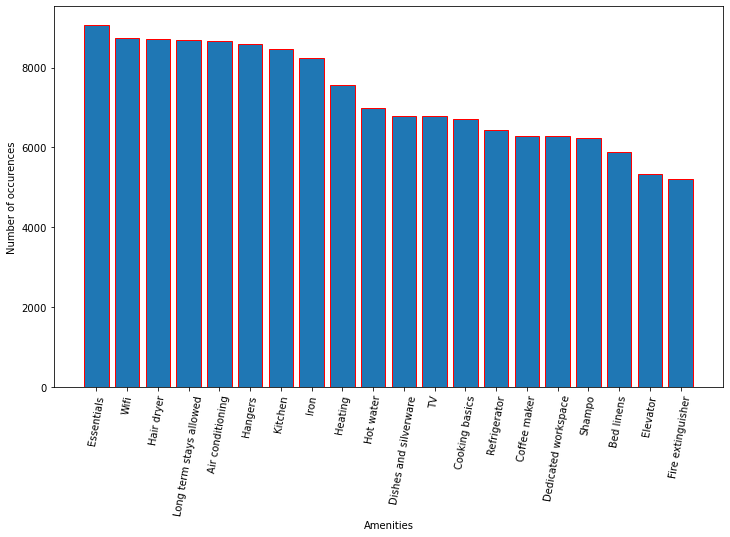

In [39]:
plt.figure(figsize=(12,7))
plt.bar(top_20.keys(), top_20.values(), edgecolor="red")
plt.xticks(rotation=80)
plt.xlabel("Amenities")
plt.ylabel("Number of occurences")
plt.show()

# 12) What is the distribution of price for each room type?

We can plot the distribution of **price per room type** usng pandas hist function with argument by= **room type**. By visualizing the distibutions allows for a more convenient observation of outlier values.

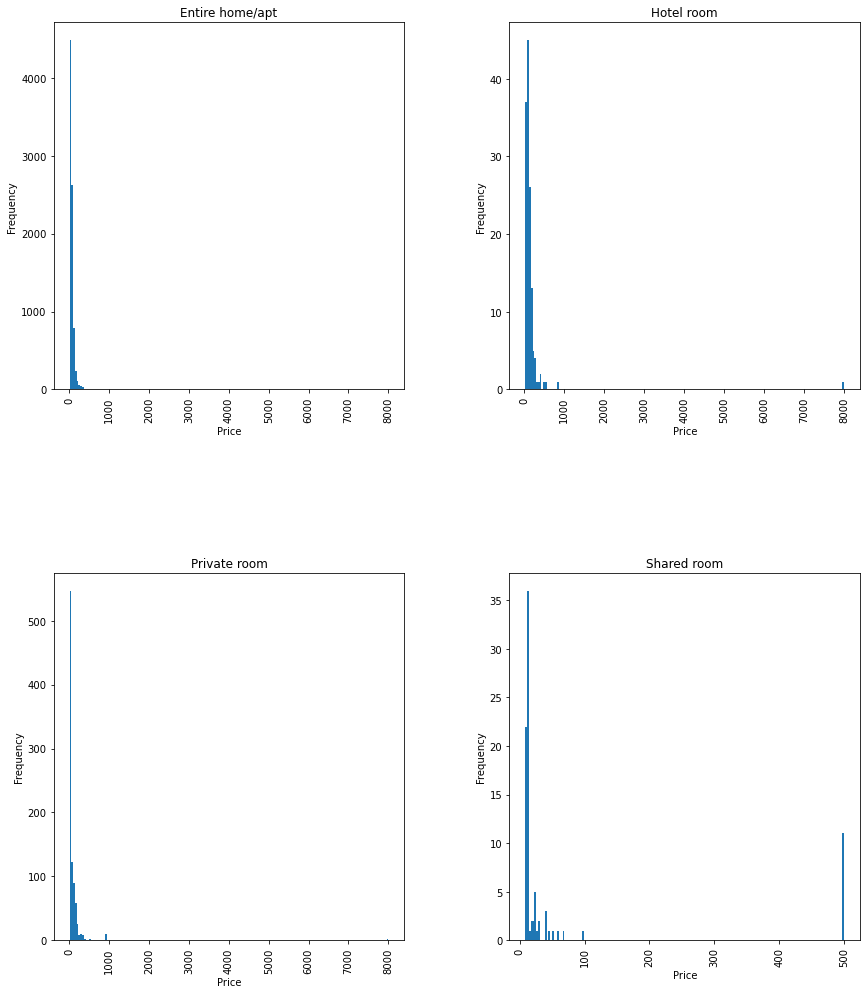

In [40]:
lis['price_cleansed'] = lis['price'].apply(lambda x : x.split('$')[1].replace(',','')).apply(lambda x: float(x))
plots = lis[['room_type','price_cleansed']].hist(by='room_type', bins=180, figsize = (14,17))
for ax in plots.flatten():
    ax.set_xlabel("Price")
    ax.set_ylabel("Frequency")

# 13) How many ratings do I have?

In [41]:
print(f' Total number of ratings: {rate.shape[0]}')

 Total number of ratings: 406607


It is also possible to check for any duplicates in the dataset:

In [42]:
print(f'Total number of duplicate ratings: {rate.duplicated(keep = "first").sum()}')

Total number of duplicate ratings: 0


# 14) Do all listings have ratings?

We can check wheter all listings have ratings by intersecting the list of all listing IDs in **listings** (lis['id].tolist( ) ) and the list of all rated listing IDs in **ratings** (rate['listing_id'].unique( ) ). Calling the unique( ) function is needed as multiple ratings might correspond to a single listing.

The length of the resulting list can be used to obtain the number of listing IDs that are contained in **listings** that have a rating.

In [43]:
rated_listing_ids = np.intersect1d(rate['listing_id'].unique(), lis['id'].tolist() )
print(f'Listings with ratings: {len(rated_listing_ids)}')


Listings with ratings: 7874


It might also be interesting to observe whether there are any listings in **listings** that have invalid rating, i.e. ratings whose comments have a nan value.

In [44]:
rated_listing_ids = np.intersect1d(rate[rate['comments'].isna()]['listing_id'].unique(), lis['id'].tolist())
print(f'Listings with invalid ratings: {len(rated_listing_ids)}')

Listings with invalid ratings: 357


We can safely conclude that only a few of the ratings with missing comments may be redundant in the dataset.